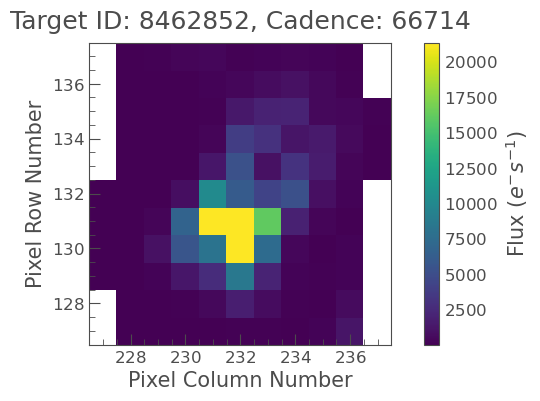

In [2]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download();
pixelfile.plot(frame=1);


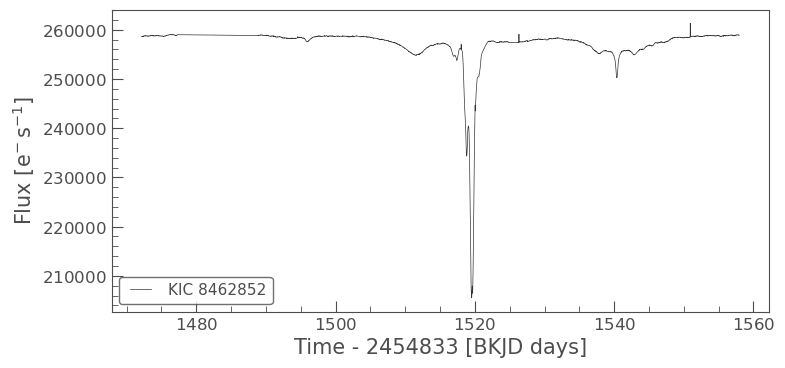

In [36]:
lc = pixelfile.to_lightcurve(aperture_mask='all');
lc.time
lc.flux
lc.plot();

In [12]:
#ROTATION PERIOD AND LIGHT CURVE(ORIGINAL)

import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

def find_rotation_period(tic_id, sector=None, flux_type='pdcsap'):
    # Search for light curve data for the given TIC ID and sector
    search_result = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    return lc, rotation_period

def plot_lightcurve(lc, rotation_period, save_path=None):
    # Plot the light curve
    lc.plot()
    plt.title(f'Light Curve - TIC {tic_id} (Sector {sector})')
    plt.xlabel('Time')
    plt.ylabel('Flux')
    plt.show()
    
    if save_path:
        plt.savefig(save_path)
        plt.close()
        
# List of TIC IDs
tic_ids = [ 64837857, 249784843, 361944360, 66539637]

# Sector number
sector = 17

# Iterate over TIC IDs
for tic_id in tic_ids:
    # Find rotation period
    lc, rotation_period = find_rotation_period(tic_id, sector=sector)

    # Print the rotation period
    print(f"TIC {tic_id} - Rotation Period: {rotation_period:.2f} days")


    # Plot the light curve and save it
    #save_path = f"TIC_{tic_id}_rotation_period_{rotation_period:.2f}_days.png"
    #plot_lightcurve(lc, rotation_period, save_path=save_path)
    #print(f"Plot saved to: {save_path}")



C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-12-5f120578ec88>:15: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


TIC 64837857 - Rotation Period: 1.66 d days


<ipython-input-12-5f120578ec88>:15: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


TIC 249784843 - Rotation Period: 0.56 d days


<ipython-input-12-5f120578ec88>:15: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


TIC 361944360 - Rotation Period: 0.85 d days
TIC 66539637 - Rotation Period: 5.81 d days


<ipython-input-12-5f120578ec88>:15: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


In [119]:
import lightkurve as lk

def find_rotation_period(tic_id, sector=None, flux_type='pdcsap'):
    # Search for light curve data for the given TIC ID and sector
    search_result = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    return lc, rotation_period

def calculate_amplitude(lc):
    # Calculate the amplitude (magnitude difference) of the light curve
    amplitude = lc.flux.max() - lc.flux.min()
    return amplitude

# List of TIC IDs
tic_ids = [64837857, 249784843, 361944360, 66539637]

# Sector number
sector = 17

# Iterate over TIC IDs
for tic_id in tic_ids:
    # Find rotation period
    lc, rotation_period = find_rotation_period(tic_id, sector=sector)

    # Calculate the amplitude
    amplitude = calculate_amplitude(lc)

    # Print the rotation period and amplitude
    print(f"TIC {tic_id} - Rotation Period: {rotation_period:.3f} days")
    print(f"TIC {tic_id} - Amplitude: {amplitude:.5f} mag")
    print()


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-119-67ed1f494831>:11: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


TIC 64837857 - Rotation Period: 1.658 d days
TIC 64837857 - Amplitude: 0.01146 mag

TIC 249784843 - Rotation Period: 0.563 d days
TIC 249784843 - Amplitude: 0.07962 mag



<ipython-input-119-67ed1f494831>:11: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-119-67ed1f494831>:11: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sec

TIC 361944360 - Rotation Period: 0.854 d days
TIC 361944360 - Amplitude: 0.00207 mag

TIC 66539637 - Rotation Period: 5.810 d days
TIC 66539637 - Amplitude: 0.03912 mag



<ipython-input-119-67ed1f494831>:11: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


In [144]:
#LIGHTCURVES AND ERROR VALUES

import lightkurve as lk
import matplotlib.pyplot as plt

def find_rotation_period(tic_id, sector=None, flux_type='pdcsap'):
    # Search for light curve data for the given TIC ID and sector
    search_result = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    if len(lc) == 0:
        print(f"No valid data found for TIC {tic_id}")
        return None, None, None

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    # Estimate the standard deviation of the periodogram power
    power_std = np.std(periodogram.power)
    # print(power_std)
    # Estimate the error in the rotation period using the Gaussian approximation
    rotation_period_err = rotation_period * (power_std / periodogram.max_power)
    #print (rotation_period_error)
    return lc, rotation_period, rotation_period_err

def plot_lightcurve(lc, rotation_period, rotation_period_err):
    # Plot the light curve
    plt.figure()
    lc.scatter(s=0.5, c='k', alpha=0.5)
    lc.fold(rotation_period).scatter(s=0.5, c='r', alpha=0.5)

    plt.xlabel('Time')
    plt.ylabel('Flux')

    plt.title(f'TIC {lc.targetid} - Rotation Period: {rotation_period:.3f} ± {rotation_period_err:.3f} days')

    plt.legend(['Original', 'Folded'], loc='best')
    plt.show()

# TIC IDs to search for
tic_ids = [64837857, 249784843, 361944360, 66539637]

# Search criteria (single sector)
sector = 17
# Iterate over TIC IDs
for tic_id in tic_ids:
    # Find rotation period
    lc, rotation_period, rotation_period_err = find_rotation_period(tic_id, sector=sector)

    if lc is None:
        continue

    # Print the rotation period and error
    print(f"TIC {tic_id} - Rotation Period: {rotation_period:.3f} ± {rotation_period_err:.3f} days")

    # Plot the light curve
    #plot_lightcurve(lc, rotation_period, rotation_period_err)


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-144-86280d337e9f>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


TIC 64837857 - Rotation Period: 1.658 d ± 0.341 d days
TIC 249784843 - Rotation Period: 0.563 d ± 0.038 d days


<ipython-input-144-86280d337e9f>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-144-86280d337e9f>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sec

TIC 361944360 - Rotation Period: 0.854 d ± 0.065 d days
TIC 66539637 - Rotation Period: 5.810 d ± 0.472 d days


<ipython-input-144-86280d337e9f>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-32-372f673f4e01>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


TIC 64837857 - Rotation Period: 1.66 d days


<Figure size 432x288 with 0 Axes>

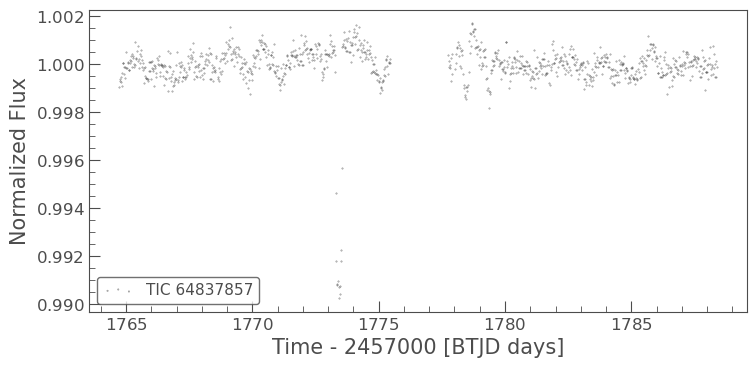

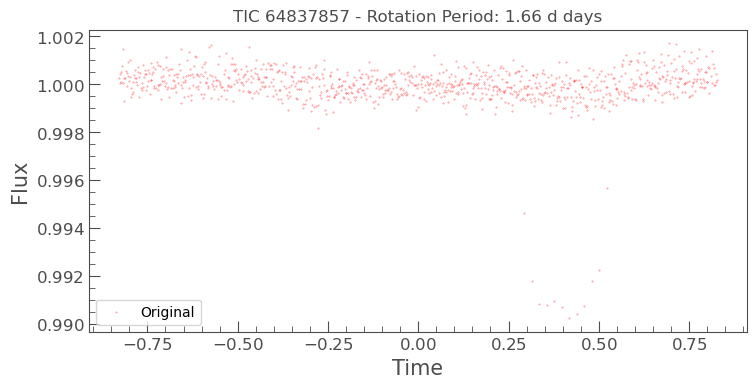

<Figure size 432x288 with 0 Axes>

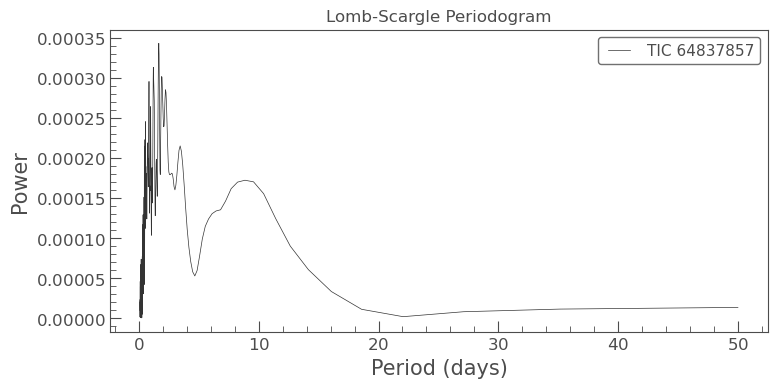

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-32-372f673f4e01>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


TIC 249784843 - Rotation Period: 0.56 d days


<Figure size 432x288 with 0 Axes>

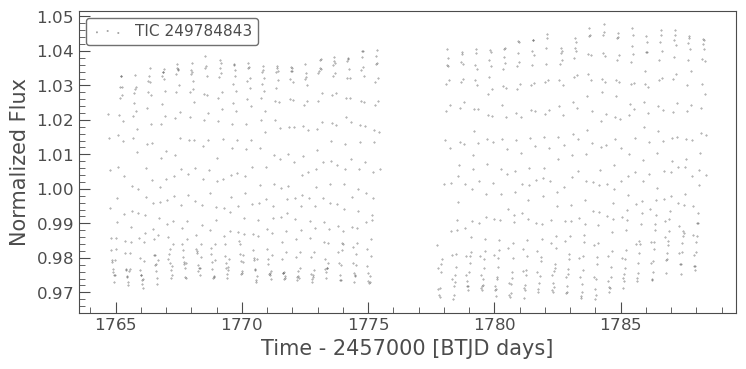

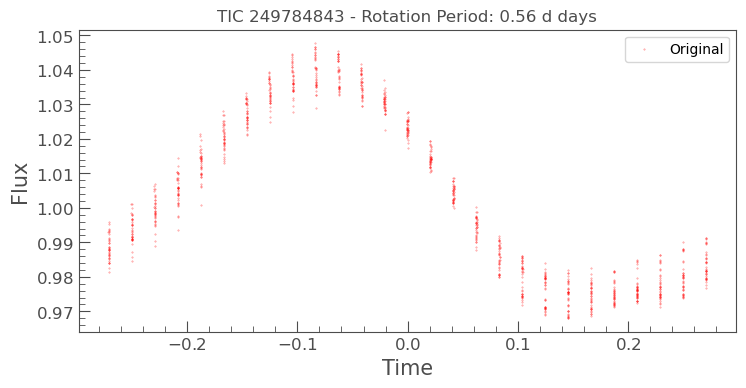

<Figure size 432x288 with 0 Axes>

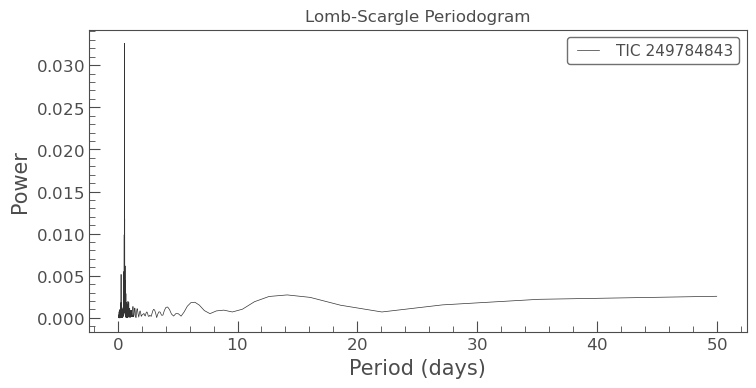

TIC 361944360 - Rotation Period: 0.85 d days


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-32-372f673f4e01>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


<Figure size 432x288 with 0 Axes>

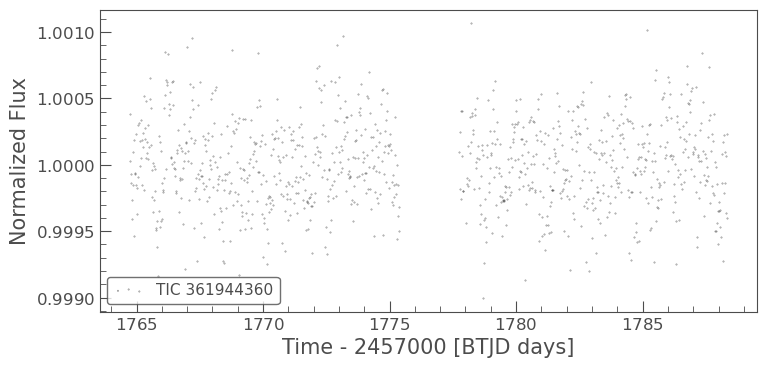

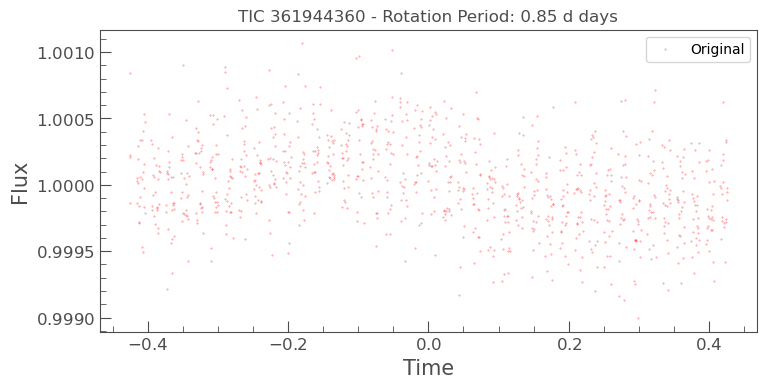

<Figure size 432x288 with 0 Axes>

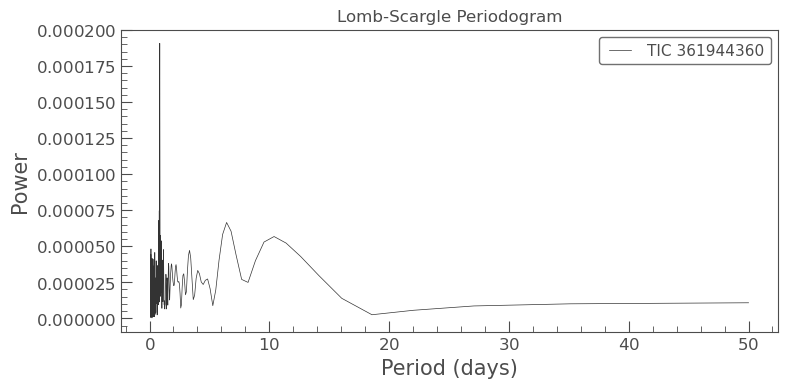

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-32-372f673f4e01>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


TIC 66539637 - Rotation Period: 5.81 d days


<Figure size 432x288 with 0 Axes>

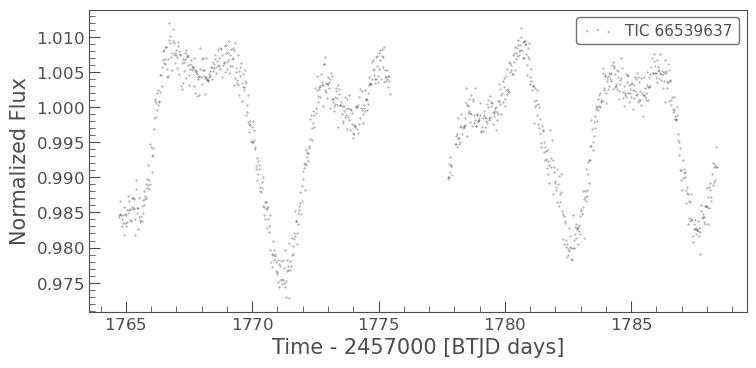

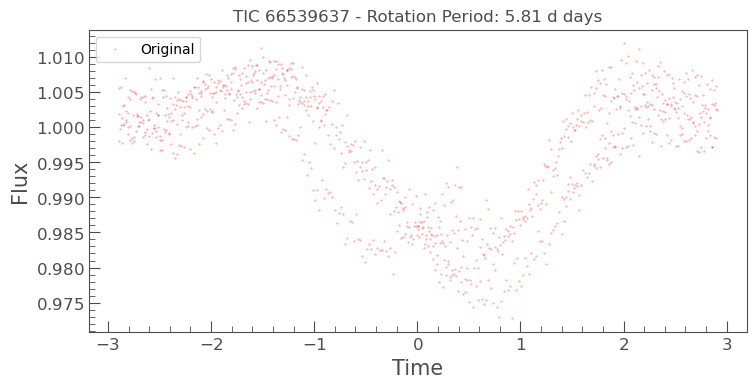

<Figure size 432x288 with 0 Axes>

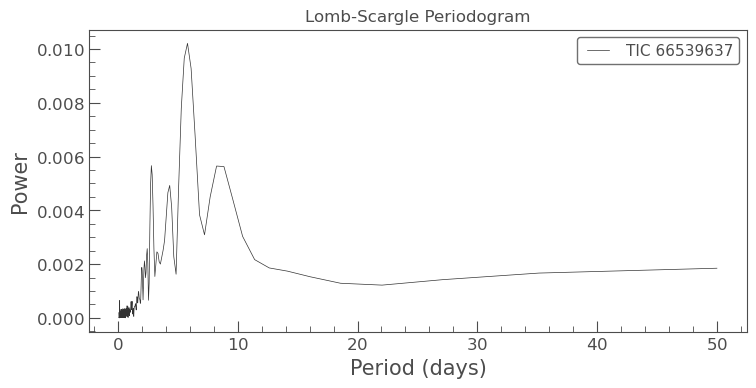

In [32]:
#LIGHT CURVE AND POWER SPECTRUM

import lightkurve as lk
import matplotlib.pyplot as plt

def find_rotation_period(tic_id, sector=None, flux_type='pdcsap'):
    # Search for light curve data for the given TIC ID and sector
    search_result = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    return lc, rotation_period, periodogram

def plot_lightcurve(lc, rotation_period):
    # Plot the light curve
    plt.figure()
    lc.scatter(s=0.5, c='k', alpha=0.5)
    lc.fold(rotation_period).scatter(s=0.5, c='r', alpha=0.5)

    plt.xlabel('Time')
    plt.ylabel('Flux')

    plt.title(f'TIC {lc.targetid} - Rotation Period: {rotation_period:.2f} days')

    plt.legend(['Original', 'Folded'], loc='best')
    plt.show()

def plot_periodogram(periodogram):
    # Plot the Lomb-Scargle periodogram
    plt.figure()
    periodogram.plot()
    plt.xlabel('Period (days)')
    plt.ylabel('Power')
    plt.title('Lomb-Scargle Periodogram')
    plt.show()

# TIC IDs to search for
tic_ids = [64837857, 249784843, 361944360, 66539637]

# Search criteria (single sector)
sector = 17

# Iterate over TIC IDs
for tic_id in tic_ids:
    # Find rotation period and periodogram
    lc, rotation_period, periodogram = find_rotation_period(tic_id, sector=sector)

    # Print the rotation period
    print(f"TIC {tic_id} - Rotation Period: {rotation_period:.2f} days")

    # Plot the light curve and periodogram
    plot_lightcurve(lc, rotation_period)
    plot_periodogram(periodogram)


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-78-4af07a6e9d79>:17: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-78-4af07a6e9d79>:17: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if fl

TIC 64837857 - Rotation Period: 1.680 d ± 0.269 d days
TIC 64837857 - Mass: 1.19 d(1/3) solar masses
TIC 64837857 - Radius: 1.41 d(2/3) solar radii
TIC 64837857 - Amplitude: 0.01150 mag



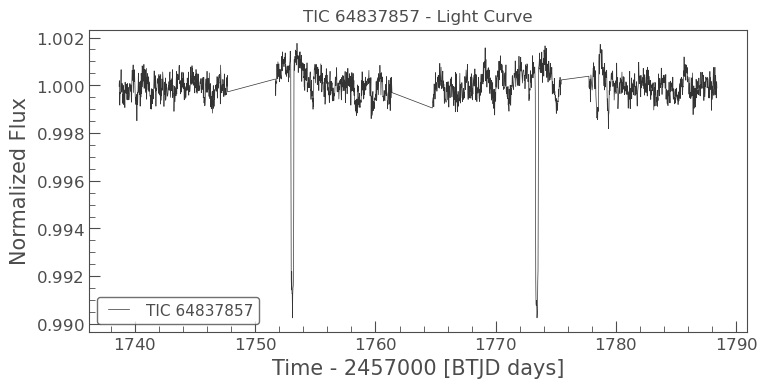

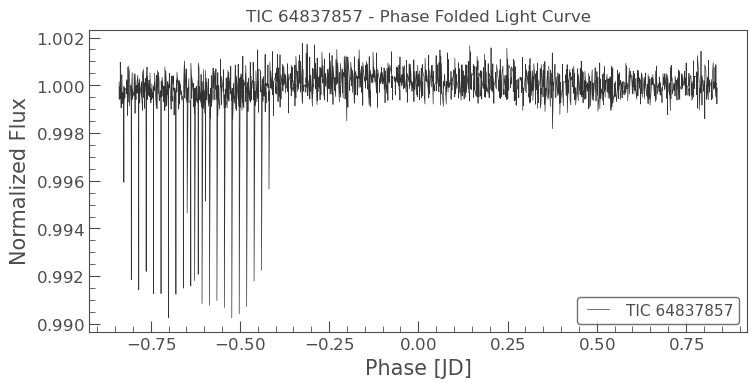

<ipython-input-78-4af07a6e9d79>:102: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 10)


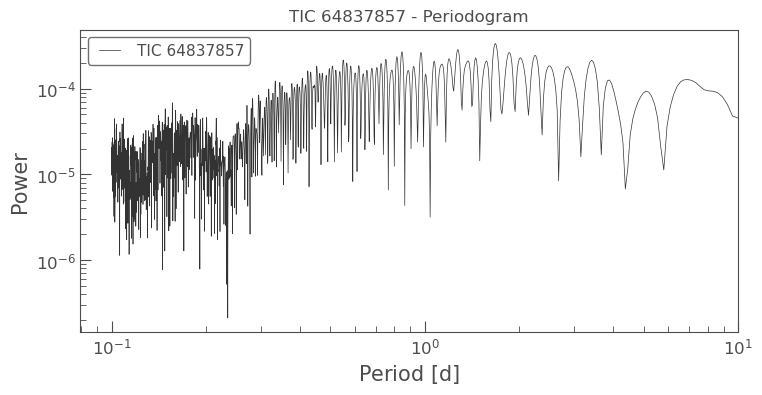

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-78-4af07a6e9d79>:17: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-78-4af07a6e9d79>:17: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if fl

TIC 249784843 - Rotation Period: 0.562 d ± 0.029 d days
TIC 249784843 - Mass: 0.83 d(1/3) solar masses
TIC 249784843 - Radius: 0.68 d(2/3) solar radii
TIC 249784843 - Amplitude: 0.07989 mag



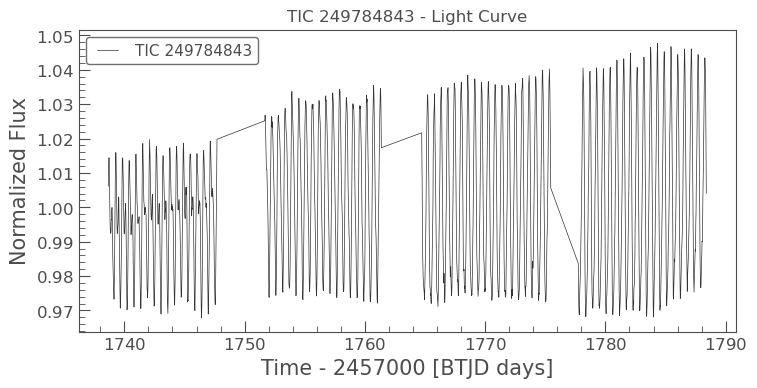

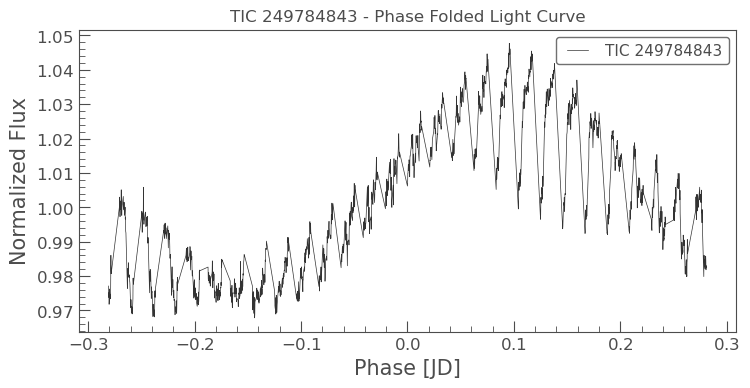

<ipython-input-78-4af07a6e9d79>:102: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 10)


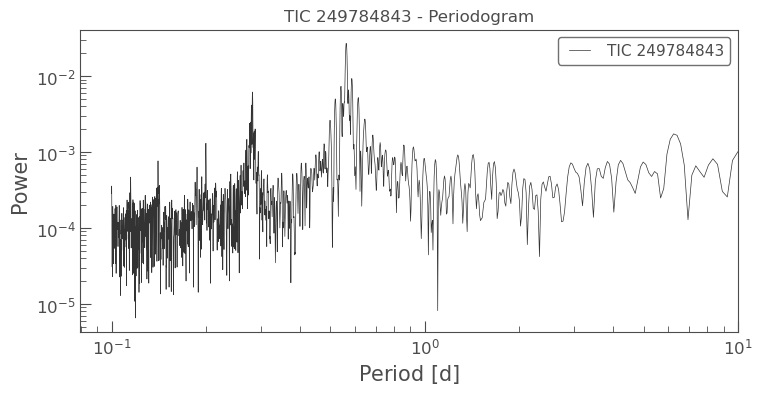

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-78-4af07a6e9d79>:17: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-78-4af07a6e9d79>:17: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if fl

TIC 361944360 - Rotation Period: 0.859 d ± 0.051 d days
TIC 361944360 - Mass: 0.95 d(1/3) solar masses
TIC 361944360 - Radius: 0.90 d(2/3) solar radii
TIC 361944360 - Amplitude: 0.00286 mag



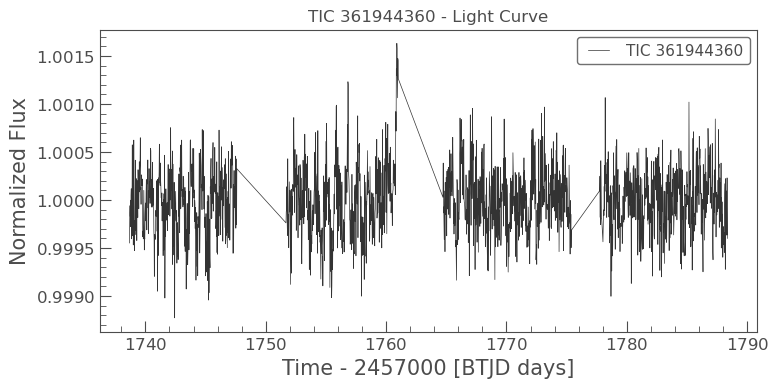

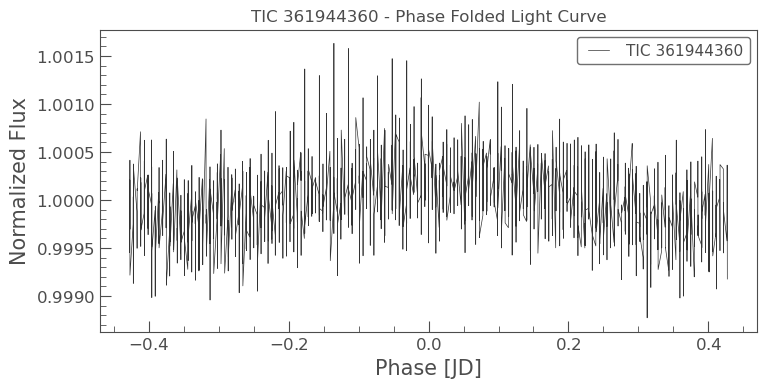

<ipython-input-78-4af07a6e9d79>:102: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 10)


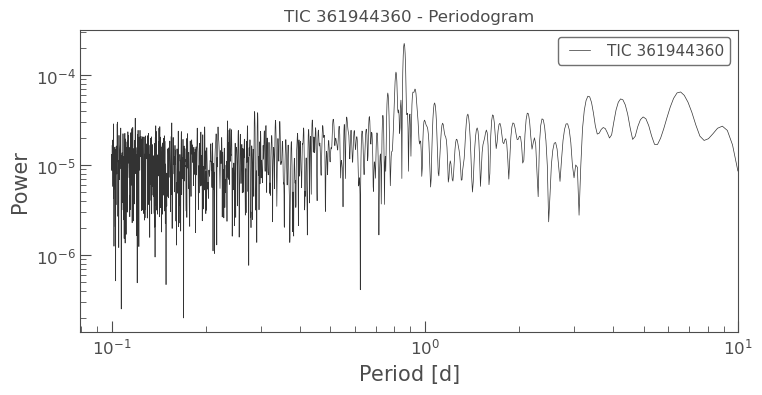

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 5 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-78-4af07a6e9d79>:17: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


KeyError: 'pdcsap_flux'

In [78]:
import lightkurve as lk
import matplotlib.pyplot as plt

def find_rotation_period(tic_id, sectors=None, flux_type='pdcsap'):
    # Initialize an empty list to store the light curves
    light_curves = []

    # Iterate over the sectors
    for sector in sectors:
        # Search for light curve data for the given TIC ID and sector
        search_result = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)

        # Download the light curve file
        lc_file = search_result.download()

        # Open the light curve file
        lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX

        # Remove NaN values and normalize the flux
        lc = lc.remove_nans().normalize()

        # Append the light curve to the list
        light_curves.append(lc)

    # Concatenate the light curves
    lc_combined = light_curves[0].append(light_curves[1:])

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc_combined.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

   # Estimate the standard deviation of the periodogram power
    power_std = np.std(periodogram.power)
    # Estimate the error in the rotation period using the Gaussian approximation
    rotation_period_err = rotation_period * (power_std / periodogram.max_power)

    return lc_combined, rotation_period, rotation_period_err


def calculate_amplitude(lc):
    # Calculate the amplitude (magnitude difference) of the light curve
    amplitude = lc.flux.max() - lc.flux.min()
    return amplitude


def calculate_mass_radius(rotation_period, lc):
    # Calculate the amplitude (magnitude difference) of the light curve
    amplitude = calculate_amplitude(lc)
    mass = rotation_period ** (1/3)
    radius = rotation_period ** (2/3)

    # Assuming solar units, scale the values accordingly
    mass *= 1.0  # Solar masses
    radius *= 1.0  # Solar radii

    return mass, radius, amplitude


# List of TIC IDs
tic_ids = [64837857, 249784843, 361944360, 66539637]

# List of sectors
sectors = [16, 17]

# Iterate over TIC IDs
for tic_id in tic_ids:
    # Find rotation period
    lc_combined, rotation_period, rotation_period_err = find_rotation_period(tic_id, sectors=sectors)

    # Check if any light curve data was found
    if lc_combined is None or rotation_period is None:
        print(f"No light curve data found for TIC {tic_id} in the specified sectors.")
        print()
        continue

    # Calculate the mass and radius
    mass, radius, amplitude = calculate_mass_radius(rotation_period, lc_combined)

    # Print the rotation period, mass, radius, and amplitude
    print(f"TIC {tic_id} - Rotation Period: {rotation_period:.3f} ± {rotation_period_err:.3f} days")
    print(f"TIC {tic_id} - Mass: {mass:.2f} solar masses")
    print(f"TIC {tic_id} - Radius: {radius:.2f} solar radii")
    print(f"TIC {tic_id} - Amplitude: {amplitude:.5f} mag")
    print()

    # Plot the light curve
    lc_combined.plot()
    plt.title(f"TIC {tic_id} - Light Curve")
    plt.show()

    # Phase fold the light curve
    folded_lc = lc_combined.fold(period=rotation_period)
    folded_lc.plot()
    plt.title(f"TIC {tic_id} - Phase Folded Light Curve")
    plt.show()

    # Generate the periodogram
    periodogram = lc_combined.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=10)

    # Plot the periodogram
    periodogram.plot(view='period', scale='log')
    plt.xlim(0, 10)
    plt.title(f"TIC {tic_id} - Periodogram")
    plt.show()


In [176]:
#SAVING TO PDF

import lightkurve as lk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def find_rotation_period(tic_id, sector=None, flux_type='pdcsap'):
    # Search for light curve data for the given TIC ID and sector
    search_result = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=25)
    rotation_period = periodogram.period_at_max_power
    
    return lc, rotation_period, periodogram

def plot_lightcurve(lc, rotation_period, pdf):
    # Create a new figure for the original light curve plot
    fig, ax = plt.subplots()
    lc.scatter(ax=ax, s=0.5, c='k', alpha=0.5)
    ax.set_xlabel('Time (BTJD)')  
    ax.set_ylabel('Flux')  
    ax.set_title(f'TIC {lc.targetid} - Rotation Period: {rotation_period:.2f} days')

    # Save the original light curve plot to PDF
    pdf.savefig(fig)
    plt.close(fig)

    # Create another figure for the folded light curve plot
    fig, ax = plt.subplots()
    lc.fold(rotation_period).scatter(ax=ax, s=0.5, c='r', alpha=0.5)
    ax.set_xlabel('Phase')  # Specify the x-axis label
    ax.set_ylabel('Flux')  # Specify the y-axis label
    ax.set_title(f'TIC {lc.targetid} - Folded Light Curve')

    # Save the folded light curve plot to PDF
    pdf.savefig(fig)
    plt.close(fig)



def plot_periodogram(periodogram, pdf):
    # Create a new figure for the periodogram plot
    fig, ax = plt.subplots()

    # Plot the Lomb-Scargle periodogram
    periodogram.plot(ax=ax)
    ax.set_xlabel('Period (days)')  # Specify the x-axis label
    ax.set_ylabel('Power')  # Specify the y-axis label
    ax.set_title('Lomb-Scargle Periodogram')

    # Set the x-axis limits to range from 0 to 10 days
    ax.set_xlim(0, 1)

    # Save the plot to PDF
    pdf.savefig(fig)
    plt.close(fig)




# TIC IDs to search for
tic_ids = [64837857, 249784843, 361944360, 66539637]

# Search criteria (single sector)
sector = 17

# Create a PDF file to save the plots
pdf_filename = 'rotation_pl.pdf'
with PdfPages(pdf_filename) as pdf:
    # Iterate over TIC IDs
    for tic_id in tic_ids:
        # Find rotation period and periodogram
        lc, rotation_period, periodogram = find_rotation_period(tic_id, sector=sector)

        # Print the rotation period
        print(f"TIC {tic_id} - Rotation Period: {rotation_period:.2f} days")

        # Plot the light curve and periodogram
        plot_lightcurve(lc, rotation_period, pdf)
        plot_periodogram(periodogram, pdf)

    print(f"All plots saved to: {pdf_filename}")


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-176-74b52752b30c>:15: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


TIC 64837857 - Rotation Period: 1.65 d days


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-176-74b52752b30c>:15: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


TIC 249784843 - Rotation Period: 0.56 d days


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-176-74b52752b30c>:15: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


TIC 361944360 - Rotation Period: 0.86 d days


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-176-74b52752b30c>:15: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


TIC 66539637 - Rotation Period: 5.71 d days
All plots saved to: rotation_pl.pdf


In [174]:
import lightkurve as lk

def find_rotation_period(tic_id, sectors=None, flux_type='pdcsap'):
    # Initialize an empty list to store the light curves
    light_curves = []

    # Iterate over the sectors
    for sector in sectors:
        # Search for light curve data for the given TIC ID and sector
        search_result = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)

        # Download the light curve file
        lc_file = search_result.download()

        # Open the light curve file
        lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX

        # Remove NaN values and normalize the flux
        lc = lc.remove_nans().normalize()

        # Append the light curve to the list
        light_curves.append(lc)

    # Concatenate the light curves
    lc_combined = light_curves[0].append(light_curves[1:])

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc_combined.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    return lc_combined, rotation_period

# TIC ID to search for
tic_id = 249784843 

# List of sectors
sectors = [16, 17]  # Modify with the desired sectors

# Find rotation period and get the combined light curve
lc, rotation_period = find_rotation_period(tic_id, sectors=sectors)

# Print the rotation period
print(f"TIC {tic_id} - Rotation Period: {rotation_period:.2f} days")

# Print the time unit of the light curve
time_unit = lc.time_format.upper()
print(f"Time Unit: {time_unit}")


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-174-c7b5799cd5d8>:16: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


TIC 249784843 - Rotation Period: 0.56 d days
Time Unit: BTJD


<ipython-input-174-c7b5799cd5d8>:16: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
<ipython-input-174-c7b5799cd5d8>:46: LightkurveDeprecationWarning: The time_format function is deprecated and may be removed in a future version.
        Use time.format instead.
  time_unit = lc.time_format.upper()


In [103]:
#SNR

import numpy as np

def find_rotation_period(tic_id, sector=None, flux_type='pdcsap'):
    # Search for light curve data for the given TIC ID and sector
    search_result = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()
    
    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    # Estimate the SNR
    power = periodogram.power
    snr = np.max(power) / np.median(power)

    return lc, rotation_period, periodogram, snr

def plot_lightcurve(lc, rotation_period, snr, pdf):
    # Create a new figure for the original light curve plot
    fig, ax = plt.subplots()
    lc.scatter(ax=ax, s=0.5, c='k', alpha=0.5)
    ax.set_xlabel('Time')
    ax.set_ylabel('Flux')
    ax.set_title(f'TIC {lc.targetid} - Rotation Period: {rotation_period:.2f} days (SNR: {snr:.2f})')

    # Save the original light curve plot to PDF
    pdf.savefig(fig)
    plt.close(fig)

    # Create another figure for the phase folded light curve plot
    fig, ax = plt.subplots()
    lc.fold(rotation_period).scatter(ax=ax, s=0.5, c='r', alpha=0.5)
    ax.set_xlabel('Phase')
    ax.set_ylabel('Flux')
    ax.set_title(f'TIC {lc.targetid} - Phase Folded Light Curve')

    # Save the phase folded light curve plot to PDF
    pdf.savefig(fig)
    plt.close(fig)


    

def plot_periodogram(periodogram, pdf):
    # Create a new figure for the periodogram plot
    fig, ax = plt.subplots()

    # Plot the Lomb-Scargle periodogram
    periodogram.plot(ax=ax)
    ax.set_xlabel('Period (days)')
    ax.set_ylabel('Power')
    ax.set_title('Lomb-Scargle Periodogram')

    # Save the plot to PDF
    pdf.savefig(fig)
    plt.close(fig)


# TIC IDs to search for
tic_ids = [64837857, 249784843, 361944360, 66539637]

# Search criteria (single sector)
sector = 17

# Create a PDF file to save the plots
pdf_filename = 'rotation.pdf'
with PdfPages(pdf_filename) as pdf:
    # Iterate over TIC IDs
    for tic_id in tic_ids:
        # Find rotation period and periodogram
        lc, rotation_period, periodogram, snr = find_rotation_period(tic_id, sector=sector)

        # Print the rotation period
        print(f"TIC {tic_id} - Rotation Period: {rotation_period:.2f} days - SNR: {snr:3f}")

        # Plot the light curve and periodogram
        plot_lightcurve(lc, rotation_period, snr, pdf)
        plot_periodogram(periodogram, pdf)

    print(f"All plots saved to: {pdf_filename}")




C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-103-ac252b8ae63e>:11: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


TIC 64837857 - Rotation Period: 1.66 d days - SNR: 9.530767


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-103-ac252b8ae63e>:11: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


TIC 249784843 - Rotation Period: 0.56 d days - SNR: 127.507709


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-103-ac252b8ae63e>:11: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


TIC 361944360 - Rotation Period: 0.85 d days - SNR: 11.773408


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-103-ac252b8ae63e>:11: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


TIC 66539637 - Rotation Period: 5.81 d days - SNR: 95.447044
All plots saved to: rotation.pdf


In [5]:
import lightkurve as lk

def find_snr(tess_object_name, sector):
    # Search and download TESS light curve for the given object name and sector
    search_result = lk.search_lightcurve(tess_object_name, mission='TESS', sector=sector)
    lc = search_result.download()

    # Compute the SNR value
    snr = lc.flux.mean() / lc.flux.std()

    return snr

# Example usage
tess_object_name = '2MASS J03422033+320531'
sector = 18

snr_value = find_snr(tess_object_name, sector)
print(f"SNR value for {tess_object_name} in sector {sector}: {snr_value:.2f}")


AttributeError: module 'numpy' has no attribute 'asscalar'

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-5-54117f2284e7>:42: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = search_result.download().PDCSAP_FLUX


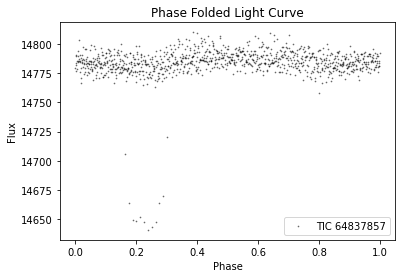

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-5-54117f2284e7>:42: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = search_result.download().PDCSAP_FLUX


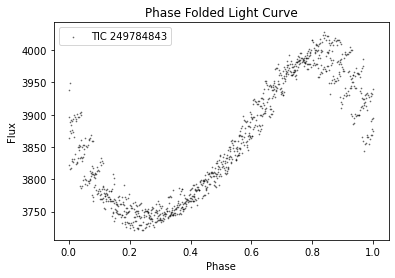

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-5-54117f2284e7>:42: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = search_result.download().PDCSAP_FLUX


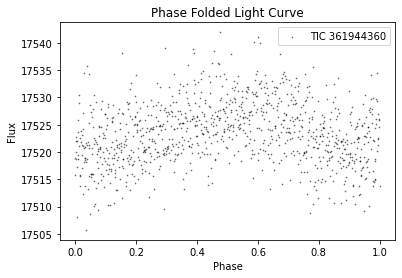

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-5-54117f2284e7>:42: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = search_result.download().PDCSAP_FLUX


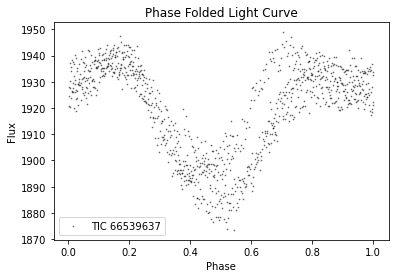

In [5]:
#PHASE FOLDING

import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

def phase_fold_lightcurve(lc, period):
    # Convert time to numerical format
    time = lc.time.value

    # Calculate the phase values
    phase = np.mod(time, period) / period

    # Sort the data by phase
    sorted_indices = np.argsort(phase)
    phase = phase[sorted_indices]
    flux = lc.flux.value[sorted_indices]

    return phase, flux

def plot_phase_folded_lightcurve(phase, flux):
    plt.figure()
    plt.scatter(phase, flux, s=0.5, c='k', alpha=0.5)
    plt.xlabel('Phase')
    plt.ylabel('Flux')
    plt.title('Phase Folded Light Curve')
    plt.legend([f'TIC {tess_id}'])
    plt.show()

# TESS IDs to search for
tess_ids = [ 64837857, 249784843, 361944360, 66539637]

# Search criteria (single sector)
sector = 17

# Iterate over TESS IDs
for tess_id in tess_ids:
    # Search for light curve data for the given TESS ID and sector
    search_result = lk.search_lightcurve(f"TIC {tess_id}", mission='TESS', sector=sector)

    # Download the light curve
    lc = search_result.download().PDCSAP_FLUX

    # Remove NaN values
    lc = lc.remove_nans()

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=30)
    rotation_period = periodogram.period_at_max_power

    # Phase fold the light curve
    phase, flux = phase_fold_lightcurve(lc, rotation_period.value)

    # Plot the phase folded light curve
    plot_phase_folded_lightcurve(phase, flux)


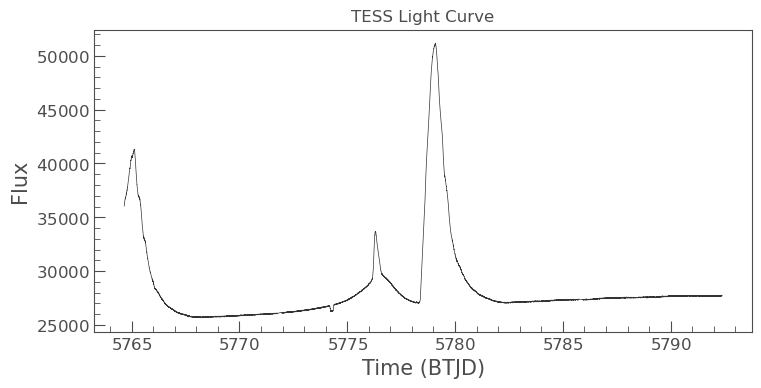

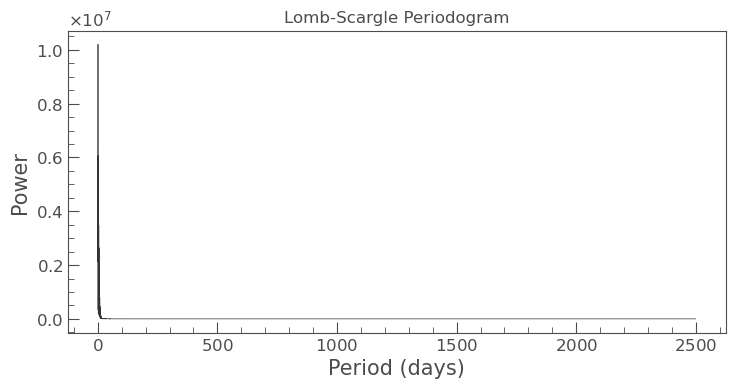

Rotation Period = 13.86 days


In [17]:
#Rotation Period FITS file

import astropy.units as u
from astropy.io import fits
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import LightCurve, periodogram

# Load the FITS file
fits_files =  'C:/Users/USER/desktop/TESS/2MASS J03422033+3205310/Tess_o2.fits'
data = hdulist[1].data

# Extract the necessary columns from the FITS data
time = data['TIME']
flux = np.sum(data['FLUX'], axis=(1, 2))

# Convert the time values to days
t_start = hdulist[1].header['TSTART']  # Start time in TCB
time = Time(t_start, format='btjd', scale='tcb') + time * u.day

# Create a LightCurve object from the data
lc = LightCurve(time=time, flux=flux)

# Plot the light curve
lc.plot()
plt.xlabel('Time (BTJD)')
plt.ylabel('Flux')
plt.title('TESS Light Curve')
plt.show()

# Estimate the rotation period using the Lomb-Scargle periodogram
#pg = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=30)
pg = lc.to_periodogram(method='lombscargle', normalization='psd')
best_fit_period = pg.period_at_max_power

# Plot the periodogram
pg.plot()
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')
plt.show()

rotation_period = best_fit_period.to_value('day')

print(f"Rotation Period = {rotation_period:.2f} days")


In [1]:
#Save in pdf
#Sector 18, 42, 43, 44, 58

import astropy.units as u
from astropy.io import fits
from astropy.time import Time
#import numpy as np
import matplotlib.pyplot as plt
from lightkurve import LightCurve, periodogram
from matplotlib.backends.backend_pdf import PdfPages

# List of FITS files
fits_files = ['C:/Users/USER/desktop/TESS/2MASS J03422033+3205310/Tess_o1.fits', 'C:/Users/USER/desktop/TESS/2MASS J03422033+3205310/Tess_o2.fits',
              'C:/Users/USER/desktop/TESS/2MASS J03422033+3205310/Tess_o3.fits', 'C:/Users/USER/desktop/TESS/2MASS J03422033+3205310/Tess_o4.fits',
              'C:/Users/USER/desktop/TESS/2MASS J03422033+3205310/Tess_o5.fits']

rotation_periods = []

# PDF file for saving the plots
pdf_file = '2MASS J03422033+3205310.pdf'

# Loop through the FITS files
with PdfPages(pdf_file) as pdf:
    for fits_file in fits_files:
        # Load the FITS file
        hdulist = fits.open(fits_file)
        data = hdulist[1].data

        # Extract the necessary columns from the FITS data
        time = data['TIME']
        flux = np.sum(data['FLUX'], axis=(1, 2))

        # Convert the time values to days
        t_start = hdulist[1].header['TSTART']  # Start time in TCB
        time = Time(t_start, format='btjd', scale='tcb') + time * u.day

        # Create a LightCurve object from the data
        lc = LightCurve(time=time, flux=flux)

        # Plot the light curve
        fig, ax = plt.subplots()
        lc.plot(ax=ax)
        ax.set_xlabel('Time (BTJD)')
        ax.set_ylabel('Flux')
        ax.set_title('TESS Light Curve')
        pdf.savefig(fig)
        plt.close()

        # Estimate the rotation period using the Lomb-Scargle periodogram
        pg = lc.to_periodogram(method='lombscargle', normalization='psd',)
        best_fit_period = pg.period_at_max_power

        # Plot the periodogram
        fig, ax = plt.subplots()
        pg.plot(ax=ax)
        ax.set_xlabel('Period (days)')
        ax.set_ylabel('Power')
        ax.set_title('Lomb-Scargle Periodogram')
        ax.set_xlim(0, 2)  # Set x-axis limits to range from 0 to 10 days
        pdf.savefig(fig)
        plt.close(fig)

        # Fold the light curve using the best-fit period
        folded_lc = lc.fold(period=best_fit_period)

        # Plot the phase-folded light curve
        fig, ax = plt.subplots()
        folded_lc.scatter(ax=ax)
        ax.set_xlabel('Phase')
        ax.set_ylabel('Flux')
        ax.set_title('Phase-folded Light Curve')
        pdf.savefig(fig)
        plt.close(fig)

        rotation_period = best_fit_period.to_value('day')
        rotation_periods.append(rotation_period)

        print(f"Rotation Period for {fits_file}: {rotation_period:.2f} days")

average_rotation_period = np.mean(rotation_periods)
print(f"Average Rotation Period for object 2MASS J03422033+3205310: {average_rotation_period:.2f} days")

print("Plots saved in 2MASS J03422033+3205310.pdf")


AttributeError: module 'numpy' has no attribute 'asscalar'

C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-24-89acd2ae61f2>:13: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()


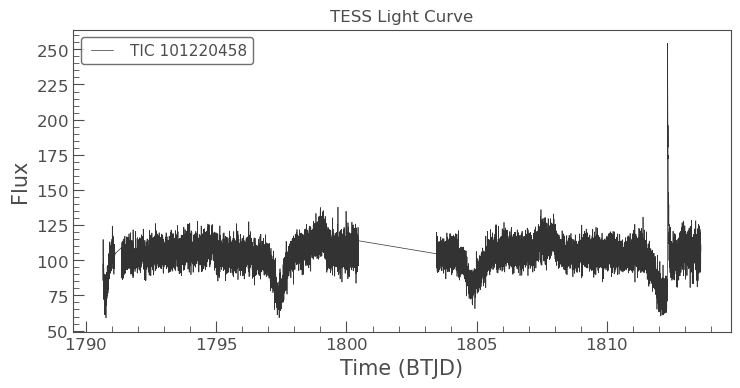

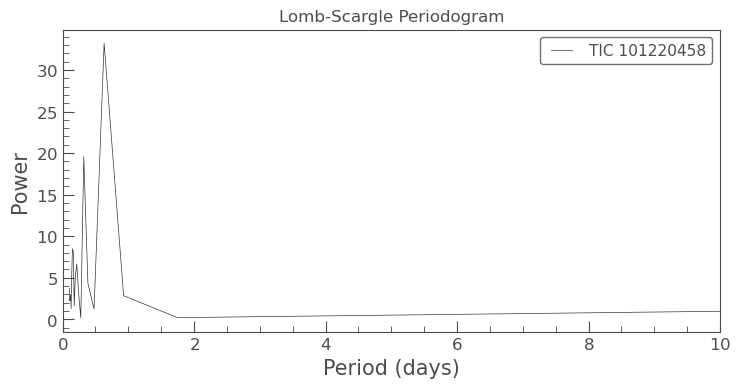

Rotation Period: 7.32 days


In [24]:
import lightkurve as lk
import matplotlib.pyplot as plt

# Object name and sector
object_name = "2MASS J03422033+3205310"
sector = 18

# Search for TESS light curve file
lc_search = lk.search_lightcurve(object_name, mission="TESS", sector=sector)
lc_file = lc_search.download()

# Plot the light curve
lc = lc_file.PDCSAP_FLUX.remove_nans()
lc.plot()
plt.xlabel('Time (BTJD)')
plt.ylabel('Flux')
plt.title('TESS Light Curve')
plt.show()

# Estimate the rotation period using the Lomb-Scargle periodogram
pg = lc.to_periodogram(method='lombscargle', normalization='psd',minimum_period=0.1, maximum_period=15)
best_fit_period = pg.period_at_max_power

# Plot the periodogram
pg.plot()
plt.xlabel('Period (days)')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')
plt.xlim(0, 10)  # Set x-axis limits to range from 0 to 10 days
plt.show()

rotation_period = best_fit_period.to_value('day')
print(f"Rotation Period: {rotation_period:.2f} days")


In [77]:
import lightkurve as lk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Object name and sector
object_name = "2MASS J03422033+3205310"
sector = 18

# Search for TESS light curve file
lc_search = lk.search_lightcurve(object_name, mission="TESS", sector=sector)
lc_file = lc_search.download()

# Plot the light curve
lc = lc_file.PDCSAP_FLUX.remove_nans()

# Plot the periodogram
pg = lc.to_periodogram(method='lombscargle', normalization='psd',minimum_period=0.1, maximum_period=15)

# Estimate the rotation period
best_fit_period = pg.period_at_max_power
rotation_period = best_fit_period.to_value('day')

print(f"Rotation Period: {rotation_period:.2f} days")
# Phase fold the light curve
folded_lc = lc.fold(period=rotation_period)

# Save the plots in a PDF file
pdf_file = f"{object_name}_sector{sector}_plots.pdf"

with PdfPages(pdf_file) as pdf:
    # Plot the light curve
    fig, ax = plt.subplots()
    lc.plot(ax=ax)
    ax.set_xlabel('Time (BTJD)')
    ax.set_ylabel('Flux')
    ax.set_title('TESS Light Curve')
    pdf.savefig(fig)
    plt.close()

    # Plot the periodogram
    fig, ax = plt.subplots()
    pg.plot(ax=ax)
    ax.set_xlabel('Period (days)')
    ax.set_ylabel('Power')
    ax.set_title('Lomb-Scargle Periodogram')
    ax.set_xlim(0,10)  # Set x-axis limits to range from 0 to 10 days
    pdf.savefig(fig)
    plt.close()

    # Plot the phase folded light curve
    fig, ax = plt.subplots()
    folded_lc.scatter(ax=ax)
    ax.set_xlabel('Phase')
    ax.set_ylabel('Flux')
    ax.set_title('Phase-folded Light Curve')
    pdf.savefig(fig)
    plt.close()

print(f"Plots saved in {pdf_file}")


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-77-a5564c8dd444>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()


Rotation Period: 7.32 days
Plots saved in 2MASS J03422033+3205310_sector18_plots.pdf


In [165]:
import lightkurve as lk

def find_rotation_period(tic_id, sectors=None, flux_type='pdcsap'):
    # Initialize an empty list to store the light curves
    light_curves = []

    # Iterate over the sectors
    for sector in sectors:
        # Search for light curve data for the given TIC ID and sector
        search_result = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)

        # Download the light curve file
        lc_file = search_result.download()

        # Open the light curve file
        lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX

        # Remove NaN values and normalize the flux
        lc = lc.remove_nans().normalize()

        # Append the light curve to the list
        light_curves.append(lc)

    # Concatenate the light curves
    lc_combined = light_curves[0].append(light_curves[1:])

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc_combined.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

   # Estimate the standard deviation of the periodogram power
    power_std = np.std(periodogram.power)
    # print(power_std)
    # Estimate the error in the rotation period using the Gaussian approximation
    rotation_period_err = rotation_period * (power_std / periodogram.max_power)
    #print (rotation_period_error)

    return lc_combined, rotation_period, rotation_period_err


def calculate_amplitude(lc):
    # Calculate the amplitude (magnitude difference) of the light curve
    amplitude = lc.flux.max() - lc.flux.min()
    return amplitude


def calculate_mass_radius(rotation_period, lc):
    # Empirical relationship for calculating mass and radius based on rotation period
    # This relationship is specific to certain types of stars and may not be applicable to all objects
    # Calculate the amplitude (magnitude difference) of the light curve
    amplitude = calculate_amplitude(lc)
    mass = rotation_period ** (1/3)
    radius = rotation_period ** (2/3)

    # Assuming solar units, scale the values accordingly
    mass *= 1.0  # Solar masses
    radius *= 1.0  # Solar radii

    return mass, radius, amplitude


# List of TIC IDs
tic_ids = [64837857, 249784843, 361944360]

# List of sectors
sectors = [16, 17]

# Iterate over TIC IDs
for tic_id in tic_ids:
    # Find rotation period
    lc, rotation_period, rotation_period_err = find_rotation_period(tic_id, sectors=sectors)

    # Check if any light curve data was found
    if lc is None or rotation_period is None:
        print(f"No light curve data found for TIC {tic_id} in the specified sectors.")
        print()
        continue

    # Calculate the mass and radius
    mass, radius, amplitude = calculate_mass_radius(rotation_period, lc)

    # Print the rotation period, mass, radius, and amplitude
    print(f"TIC {tic_id} - Rotation Period: {rotation_period:.3f} ± {rotation_period_err:.3f} days")
    print(f"TIC {tic_id} - Mass: {mass:.2f} solar masses")
    print(f"TIC {tic_id} - Radius: {radius:.2f} solar radii")
    print(f"TIC {tic_id} - Amplitude: {amplitude:.5f} mag")
    print()


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-165-17e70884bdc0>:16: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-165-17e70884bdc0>:16: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if 

TIC 64837857 - Rotation Period: 1.680 d ± 0.269 d days
TIC 64837857 - Mass: 1.19 d(1/3) solar masses
TIC 64837857 - Radius: 1.41 d(2/3) solar radii
TIC 64837857 - Amplitude: 0.01150 mag



<ipython-input-165-17e70884bdc0>:16: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-165-17e70884bdc0>:16: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sec

TIC 249784843 - Rotation Period: 0.562 d ± 0.029 d days
TIC 249784843 - Mass: 0.83 d(1/3) solar masses
TIC 249784843 - Radius: 0.68 d(2/3) solar radii
TIC 249784843 - Amplitude: 0.07989 mag

TIC 361944360 - Rotation Period: 0.859 d ± 0.051 d days
TIC 361944360 - Mass: 0.95 d(1/3) solar masses
TIC 361944360 - Radius: 0.90 d(2/3) solar radii
TIC 361944360 - Amplitude: 0.00286 mag



<ipython-input-165-17e70884bdc0>:16: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-165-17e70884bdc0>:16: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


In [89]:
import lightkurve as lk
import numpy as np

def find_rotation_period(object_name, sectors=None, flux_type='pdcsap'):
    # Initialize an empty list to store the light curves
    light_curves = []

    # Iterate over the sectors
    for sector in sectors:
        # Search for light curve data for the given object name and sector
        search_result = lk.search_lightcurve(object_name, sector=sector)

        # Download the light curve file
        lc_file = search_result.download()

        # Open the light curve file
        lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX

        # Remove NaN values and normalize the flux
        lc = lc.remove_nans().normalize()

        # Append the light curve to the list
        light_curves.append(lc)

    # Concatenate the light curves
    lc_combined = light_curves[0].append(light_curves[1:])

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc_combined.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period= 47)
    rotation_period = periodogram.period_at_max_power
 
    # Estimate the standard deviation of the periodogram power
    power_std = np.std(periodogram.power)
    # print(power_std)
    # Estimate the error in the rotation period using the Gaussian approximation
    rotation_period_err = rotation_period * (power_std / periodogram.max_power)
    #print (rotation_period_error)
    return lc_combined, rotation_period, rotation_period_err
    

def calculate_amplitude(lc):
    # Calculate the peak-to-peak amplitude of the light curve
    amplitude =  np.ptp(lc.flux)

    return amplitude

def calculate_mass_radius(rotation_period):
    # Empirical relationship for calculating mass and radius based on rotation period
    # This relationship is specific to certain types of stars and may not be applicable to all objects
    mass = rotation_period ** (1/3)
    radius = rotation_period ** (2/3)

    # Assuming solar units, scale the values accordingly
    mass *= 1.0  # Solar masses
    radius *= 1.0  # Solar radii

    return mass, radius

# List of object names
object_names = ['2MASS J03422033+3205310']

# List of sectors
sectors = [44]  # Modify with the desired sectors

# Iterate over object names
for object_name in object_names:
    # Find rotation period
    lc, rotation_period, rotation_period_err= find_rotation_period(object_name, sectors=sectors)
    
    # Calculate the amplitude
    amplitude = calculate_amplitude(lc)

    # Calculate the mass and radius
    mass, radius = calculate_mass_radius(rotation_period)

    # Print the rotation period, mass, radius, and amplitude
    print(f"Object: {object_name} TIC 101220458")
    print(f"Rotation Period: {rotation_period:.3f} ± {rotation_period_err:.3f} days")
    print(f"Mass: {mass:.2f} solar masses")
    print(f"Radius: {radius:.2f} solar radii")
    print(f"Amplitude: {amplitude:.5f} mag")
    print()


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-89-e8636999fb28>:17: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX


Object: 2MASS J03422033+3205310 TIC 101220458
Rotation Period: 3.611 d ± 0.364 d days
Mass: 1.53 d(1/3) solar masses
Radius: 2.35 d(2/3) solar radii
Amplitude: 0.93297 mag



In [106]:
import lightkurve as lk

def find_rms_amplitude(object_name, sector):
    # Search for light curve data for the given object name and sector
    search_result = lk.search_lightcurve(object_name, author='SPOC', sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    # Calculate the RMS amplitude of the light curve
    rms_amplitude = lc.flux.std()

    return rms_amplitude

# Object name and sector
object_name = '2MASS J03422033+3205310'  # Replace with the actual object name
sector = 18

# Find the RMS amplitude
rms_amplitude = find_rms_amplitude(object_name, sector)

# Print the RMS amplitude
print(f"RMS Amplitude: {rms_amplitude:.5f}")


RMS Amplitude: 0.10368


<ipython-input-106-9921052da96b>:11: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX


In [101]:
import lightkurve as lk
import numpy as np

def find_rms_amplitude(tic_ids, sectors):
    # Initialize an empty list to store the RMS amplitudes
    rms_amplitudes = []

    # Iterate over the TIC IDs
    for tic_id in tic_ids:
        # Initialize an empty list to store the light curves
        light_curves = []

        # Iterate over the sectors
        for sector in sectors:
            # Search for light curve data for the given TIC ID and sector
            search_result = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)

            # Download the light curve file
            lc_file = search_result.download()

            # Open the light curve file
            lc = lc_file.PDCSAP_FLUX

            # Remove NaN values and normalize the flux
            lc = lc.remove_nans().normalize()

            # Append the light curve to the list
            light_curves.append(lc)

        # Concatenate the light curves
        lc_combined = light_curves[0].append(light_curves[1:])

        # Calculate the RMS amplitude
        rms_amplitude = np.sqrt(np.mean(lc_combined.flux ** 2))

        # Append the RMS amplitude to the list
        rms_amplitudes.append(rms_amplitude)

    return rms_amplitudes

# List of TIC IDs
tic_ids = [64837857, 249784843, 361944360]

# List of sectors
sectors = [16, 17]

# Find the RMS amplitudes
rms_amplitudes = find_rms_amplitude(tic_ids, sectors)

# Print the RMS amplitudes
for tic_id, rms_amplitude in zip(tic_ids, rms_amplitudes):
    print(f"TIC {tic_id} - RMS Amplitude: {rms_amplitude:.5f}")


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-101-17c4a98dc1ab>:22: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-101-17c4a98dc1ab>:22: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkur

TIC 64837857 - RMS Amplitude: 0.99993
TIC 249784843 - RMS Amplitude: 1.00214
TIC 361944360 - RMS Amplitude: 1.00000


<ipython-input-101-17c4a98dc1ab>:22: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX


In [12]:
import lightkurve as lk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def find_rotation_period(tic_id, sectors=None, flux_type='pdcsap'):
    # Initialize an empty list to store the light curves
    light_curves = []

    # Iterate over the sectors
    for sector in sectors:
        # Search for light curve data for the given TIC ID and sector
        search_result = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)

        # Download the light curve file
        lc_file = search_result.download()

        # Open the light curve file
        lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX

        # Remove NaN values and normalize the flux
        lc = lc.remove_nans().normalize()

        # Append the light curve to the list
        light_curves.append(lc)

    # Concatenate the light curves
    lc_combined = light_curves[0].append(light_curves[1:])

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc_combined.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    # Estimate the standard deviation of the periodogram power
    power_std = periodogram.power.std()
    # Estimate the error in the rotation period using the Gaussian approximation
    rotation_period_err = rotation_period * (power_std / periodogram.max_power)

    return lc_combined, rotation_period, rotation_period_err


def calculate_amplitude(lc):
    # Calculate the amplitude (magnitude difference) of the light curve
    amplitude = lc.flux.max() - lc.flux.min()
    return amplitude


def calculate_mass_radius(rotation_period, lc):
    # Calculate the amplitude (magnitude difference) of the light curve
    amplitude = calculate_amplitude(lc)
    mass = rotation_period ** (1/3)
    radius = rotation_period ** (2/3)

    # Assuming solar units, scale the values accordingly
    mass *= 1.0  # Solar masses
    radius *= 1.0  # Solar radii

    return mass, radius, amplitude


# List of TIC IDs
tic_ids = [64837857, 249784843, 361944360]

# List of sectors
sectors = [16, 17]

# Create a PDF file for saving the plots
pdf_plots = PdfPages("plots.pdf")

# Iterate over TIC IDs
for tic_id in tic_ids:
    # Find rotation period
    lc_combined, rotation_period, rotation_period_err = find_rotation_period(tic_id, sectors=sectors)

    # Check if any light curve data was found
    if lc_combined is None or rotation_period is None:
        print(f"No light curve data found for TIC {tic_id} in the specified sectors.")
        print()
        continue

    # Calculate the mass and radius
    mass, radius, amplitude = calculate_mass_radius(rotation_period, lc_combined)

    # Print the rotation period, mass, radius, and amplitude
    print(f"TIC {tic_id} - Rotation Period: {rotation_period:.3f} ± {rotation_period_err:.3f} days")
    print(f"TIC {tic_id} - Mass: {mass:.2f} solar masses")
    print(f"TIC {tic_id} - Radius: {radius:.2f} solar radii")
    print(f"TIC {tic_id} - Amplitude: {amplitude:.5f} mag")
    print()

    # Plot the light curve
    lc_combined.plot()
    plt.title(f"TIC {tic_id} - Light Curve")
    pdf_plots.savefig()
    plt.close()

    # Phase fold the light curve
    folded_lc = lc_combined.fold(period=rotation_period)
    folded_lc.plot()
    plt.title(f"TIC {tic_id} - Phase Folded Light Curve")
    pdf_plots.savefig()
    plt.close()

    # Generate the periodogram
    periodogram = lc_combined.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=10)

    # Plot the periodogram
    periodogram.plot(view='period', scale='linear')
    plt.xlim(0, 10)
    plt.title(f"TIC {tic_id} - Periodogram")
    pdf_plots.savefig()
    plt.close()

# Save and close the PDF file
pdf_plots.close()


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-12-fed22a92a891>:18: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-12-fed22a92a891>:18: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if fl

TIC 64837857 - Rotation Period: 1.680 d ± 0.269 d days
TIC 64837857 - Mass: 1.19 d(1/3) solar masses
TIC 64837857 - Radius: 1.41 d(2/3) solar radii
TIC 64837857 - Amplitude: 0.01150 mag



C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-12-fed22a92a891>:18: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-12-fed22a92a891>:18: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if fl

TIC 249784843 - Rotation Period: 0.562 d ± 0.029 d days
TIC 249784843 - Mass: 0.83 d(1/3) solar masses
TIC 249784843 - Radius: 0.68 d(2/3) solar radii
TIC 249784843 - Amplitude: 0.07989 mag



C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-12-fed22a92a891>:18: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if flux_type == 'pdcsap' else lc_file.SAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-12-fed22a92a891>:18: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX if fl

TIC 361944360 - Rotation Period: 0.859 d ± 0.051 d days
TIC 361944360 - Mass: 0.95 d(1/3) solar masses
TIC 361944360 - Radius: 0.90 d(2/3) solar radii
TIC 361944360 - Amplitude: 0.00286 mag



In [80]:
# Rotation Velocity

import lightkurve as lk

def find_rotation_period_vsini(tic_id, sectors):
    # Initialize empty lists to store the light curves
    light_curves = []

    # Iterate over the sectors
    for sector in sectors:
        # Search for light curve data for the given TIC ID and sector
        search_result = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)

        # Download the light curve file
        lc_file = search_result.download()

        # Open the light curve file
        lc = lc_file.PDCSAP_FLUX

        # Remove NaN values and normalize the flux
        lc = lc.remove_nans().normalize()

        # Append the light curve to the list
        light_curves.append(lc)

    # Concatenate the light curves
    lc_combined = light_curves[0].append(light_curves[1:])

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc_combined.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    # Estimate the rotation velocity (vsini) using the period and the stellar radius
    stellar_radius = 0.68  # Assuming solar radius
    vsini =  2* stellar_radius * rotation_period * 24  # Convert period to hours

    return rotation_period, vsini


# TIC ID and sectors
tic_id = 249784843
sectors = [16, 17]

# Find rotation period and rotation velocity
rotation_period, vsini = find_rotation_period_vsini(tic_id, sectors)

# Print the results
print(f"TIC {tic_id} - Rotation Period: {rotation_period:.3f} days")
print(f"TIC {tic_id} - Rotation Velocity (vsini): {vsini:.2f} km/s")


C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
<ipython-input-80-ac94f8df7901>:18: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX
C:\Users\USER\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


TIC 249784843 - Rotation Period: 0.562 d days
TIC 249784843 - Rotation Velocity (vsini): 18.36 d km/s


<ipython-input-80-ac94f8df7901>:18: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX


C:\Users\USER\AppData\Local\Temp\ipykernel_7988\395217044.py:13: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX


Rotation Period: 3.575 d days


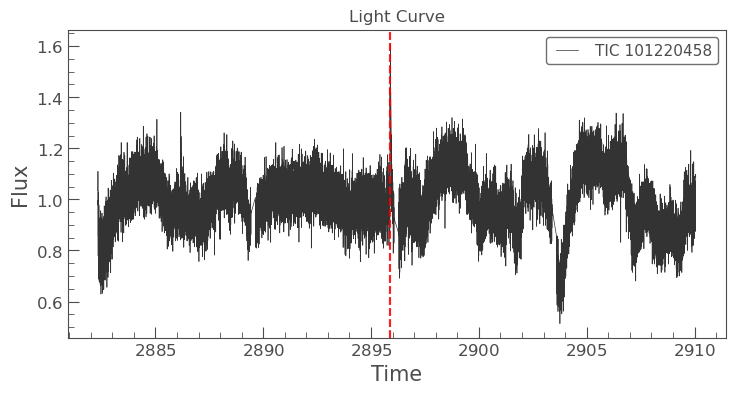

In [3]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

def find_rotation_period(object_name, sector):
    # Search for light curve data for the given object name and sector
    search_result = lk.search_lightcurve(object_name, author='SPOC', sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    return lc, rotation_period

def find_flare_events(lc, threshold=5):
    # Find flare events based on a flux threshold
    flux = lc.flux
    median_flux = np.median(flux)
    std_flux = np.std(flux)
    flare_threshold = median_flux + threshold * std_flux

    is_flare = flux > flare_threshold
    flare_times = lc.time[is_flare]

    flares = [{'tpeak': t} for t in flare_times]

    return flares

def plot_light_curve(lc, flares=None):
    # Plot the light curve
    lc.plot()
    plt.title('Light Curve')
    plt.xlabel('Time')
    plt.ylabel('Flux')

    # Highlight flare events if provided
    if flares is not None:
        for flare in flares:
            plt.axvline(flare['tpeak'].value, color='r', linestyle='--', alpha=0.5)

    plt.show()

# Object name and sector
object_name = '2MASS J03422033+3205310'  # Replace with the actual object name
sector = 58

# Find rotation period and flare events
lc, rotation_period = find_rotation_period(object_name, sector)
flares = find_flare_events(lc)

# Print the rotation period
print(f"Rotation Period: {rotation_period:.3f} days")

# Plot the light curve with flare events
plot_light_curve(lc, flares)


Rotation Period: 3.240 d days
Flare Events:
Flare 1:
  Date: 2021-10-28 18:20:22.293
  Peak Flux: 1.551



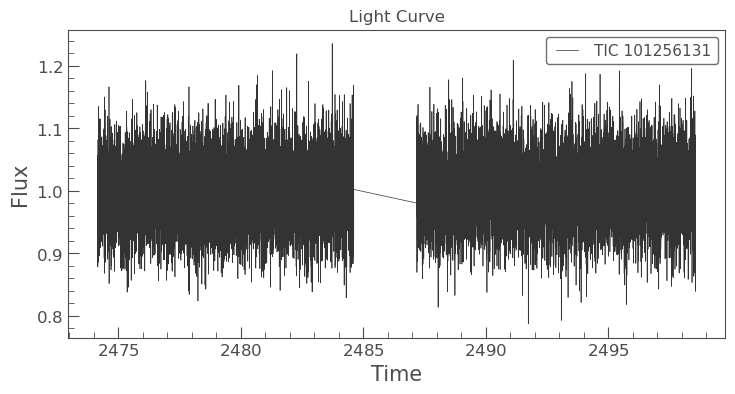

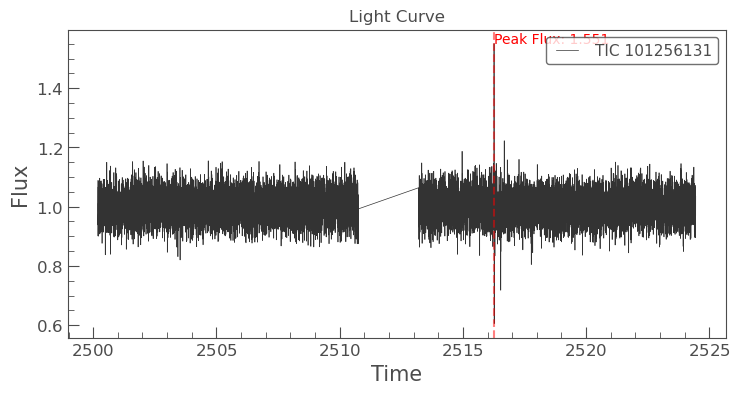

2516.2141469046674 2516.3141469046677


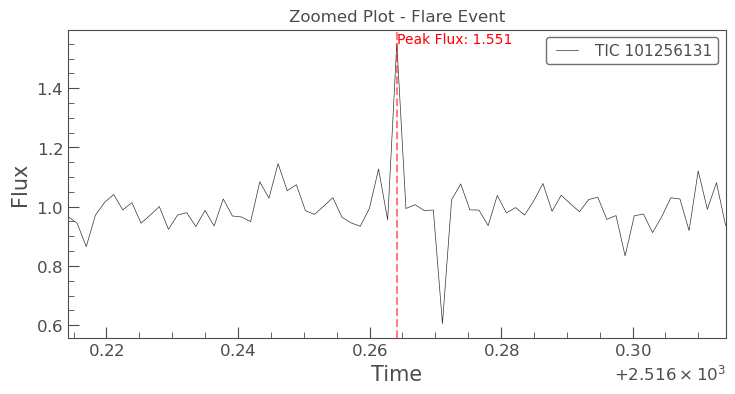

In [12]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

def find_rotation_period(object_name, sector):
    # Search for light curve data for the given object name and sector
    search_result = lk.search_lightcurve(object_name, author='SPOC', sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    return lc, rotation_period

def find_flare_events(lc, threshold=5):
    # Find flare events based on a flux threshold
    flux = lc.flux
    median_flux = np.median(flux)
    std_flux = np.std(flux)
    flare_threshold = median_flux + threshold * std_flux

    is_flare = flux > flare_threshold
    flare_times = lc.time[is_flare]
    flare_fluxes = flux[is_flare]

    flares = [{'tpeak': t, 'date': t.iso, 'peak_flux': f} for t, f in zip(flare_times, flare_fluxes)]

    return flares

def plot_light_curve(lc, flares=None, flare_event_index=None):
    # Plot the light curve
    lc.plot()
    plt.title('Light Curve')
    plt.xlabel('Time')
    plt.ylabel('Flux')

    # Highlight flare events if provided
    if flares is not None:
        for flare in flares:
            plt.axvline(flare['tpeak'].value, color='r', linestyle='--', alpha=0.5)
            plt.text(flare['tpeak'].value, np.max(lc.flux), f"Peak Flux: {flare['peak_flux']:.3f}", color='r')

    # Zoomed plot of a selected flare event if specified
    if flares is not None and flare_event_index is not None:
        flare_event = flares[flare_event_index]
        flare_time = flare_event['tpeak']
        flare_duration = 0.1  # Adjust the duration as needed

        # Calculate the time range for the zoomed plot
        tstart = flare_time - flare_duration / 2
        tend = flare_time + flare_duration / 2
        print(tstart.value,tend.value)
        # Set the plot limits and title
        plt.xlim(tstart.value, tend.value)
        plt.title('Zoomed Plot - Flare Event')

    plt.show()

# Object name and sector
object_name = "2MASS J03442980+3200545"  # Replace with the actual object name
sector = 44 

# Find rotation period and flare events
lc, rotation_period = find_rotation_period(object_name, sector)
flares = find_flare_events(lc)

# Print the rotation period
print(f"Rotation Period: {rotation_period:.3f} days")

# Print details of flare events
if flares:
    print("Flare Events:")
    for i, flare in enumerate(flares):
        print(f"Flare {i+1}:")
        print(f"  Date: {flare['date']}")
        print(f"  Peak Flux: {flare['peak_flux']:.3f}")
        print()
else:
    print("No flare events found.")

# Plot the light curve with flare events
plot_light_curve(lc, flares)

# Select a flare event for zoomed plot
flare_event_index = 0  # Replace with the index of the desired flare event

# Plot the zoomed plot of the selected flare event
plot_light_curve(lc, flares, flare_event_index)


C:\Users\USER\AppData\Local\Temp\ipykernel_4672\1867820312.py:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX


Key Parameters:
Rotation Period: 7.037 d days
Flare Time: 2458812.319 (JD)
Flare Energy: 2.140e+00 (normalized flux)
Flare Duration: 2265.588 s seconds (37.76 minutes)
Rotation Period: 7.037 d days


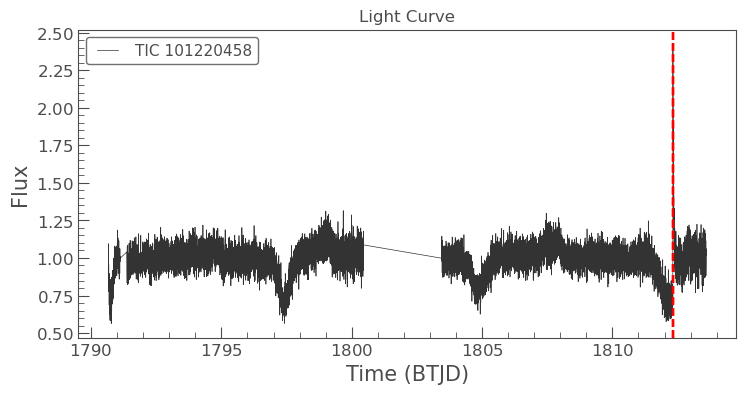

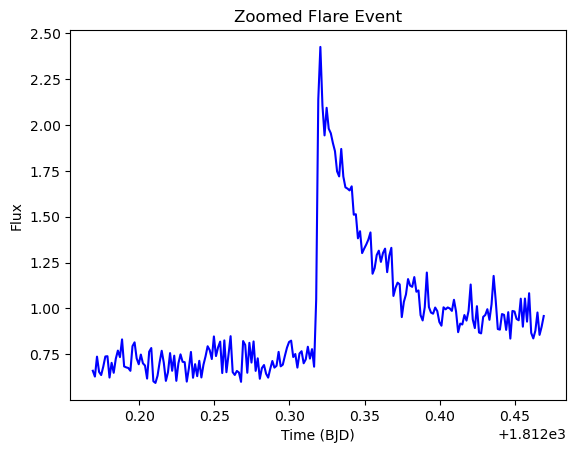

In [2]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

def find_rotation_period(object_name, sector):
    # Search for light curve data for the given object name and sector
    search_result = lk.search_lightcurve(object_name, author='SPOC', sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    return lc, rotation_period

def find_flare_events(lc, threshold=5):
    # Find flare events based on a flux threshold
    flux = lc.flux
    median_flux = np.median(flux)
    std_flux = np.std(flux)
    flare_threshold = median_flux + threshold * std_flux

    is_flare = flux > flare_threshold
    flare_times = lc.time[is_flare]
    flare_energies = lc.flux[is_flare]

    flares = [{'tpeak': t, 'energy': e} for t, e in zip(flare_times, flare_energies)]

    return flares

def plot_light_curve(lc, flares=None):
    # Plot the light curve
    lc.plot()
    plt.title('Light Curve')
    plt.xlabel('Time (BTJD)')
    plt.ylabel('Flux')

    # Highlight flare events if provided
    if flares is not None:
        for flare in flares:
            plt.axvline(flare['tpeak'].value, color='r', linestyle='--', alpha=0.5)

    plt.show()

def plot_zoomed_flare(lc, flare_time, window_size=0.2):
    # Extract the flare region around the specified time
    t_start = flare_time - window_size/2
    t_end = flare_time + window_size/2
    flare_lc = lc[lc.time >= t_start]
    flare_lc = flare_lc[flare_lc.time <= t_end]

    # Convert time and flux to numpy arrays
    time = flare_lc.time.value
    flux = flare_lc.flux.value

    # Fold the flare light curve to the rotation period
    phase = (flare_lc.time - flare_lc.time[0]) / rotation_period % 1

    # Plot the zoomed flare
    plt.plot(time, flux, color='b')
    plt.title('Zoomed Flare Event')
    plt.xlabel('Time (BJD)')
    plt.ylabel('Flux')

    plt.show()

# Object name and sector
object_name = '2MASS J03422033+3205310'  # Replace with the actual object name
sector = 18

# Find rotation period and flare events
lc, rotation_period = find_rotation_period(object_name, sector)
flares = find_flare_events(lc)

def print_key_parameters(rotation_period, flares):
    if len(flares) > 0:
        # Get the flare energy and time of the first flare
        first_flare = flares[0]
        flare_time = first_flare['tpeak']
        flare_energy = first_flare['energy']

        # Calculate the flare duration
        first_flare = flares[0]
        last_flare = flares[16]
        #print(flares[1])
        flare_start = first_flare['tpeak'] - 0.002
        flare_end = last_flare['tpeak'] + 0.002
        flare_duration = (flare_end - flare_start).to(u.s)  # Duration in seconds
        flare_duration_minutes = (flare_duration.to(u.min)).value  # Duration in minutes
        flare_duration_hours = (flare_duration.to(u.hour)).value  # Duration in hours

        # Print key parameters
        print("Key Parameters:")
        print(f"Rotation Period: {rotation_period:.3f} days")
        print(f"Flare Time: {flare_time.jd:.3f} (JD)")
        print(f"Flare Energy: {flare_energy:.3e} (normalized flux)")
        print(f"Flare Duration: {flare_duration:.3f} seconds ({flare_duration_minutes:.2f} minutes)")
    else:
        print("No flare events found.")

        

# Print key parameters
print_key_parameters(rotation_period, flares)

# Print the rotation period
print(f"Rotation Period: {rotation_period:.3f} days")

# Plot the light curve with flare events
plot_light_curve(lc, flares)

# Plot a zoomed flare event (first flare in the list)
if flares:
    flare_time = flares[0]['tpeak']
    window_size = 0.3

    # Define the window size for the zoomed flare plot
    plot_zoomed_flare(lc, flare_time, window_size)



In [152]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

def find_rotation_period(object_name, sector):
    # Search for light curve data for the given object name and sector
    search_result = lk.search_lightcurve(object_name, author='SPOC', sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    return lc, rotation_period

def find_flare_events(lc, threshold=5):
    # Find flare events based on a flux threshold
    flux = lc.flux
    median_flux = np.median(flux)
    std_flux = np.std(flux)
    flare_threshold = median_flux + threshold * std_flux

    is_flare = flux > flare_threshold
    flare_times = lc.time[is_flare]
    flare_energies = lc.flux[is_flare]

    flares = [{'tpeak': t, 'energy': e} for t, e in zip(flare_times, flare_energies)]

    return flares

def plot_light_curve(lc, flares=None):
    # Plot the light curve
    fig, ax = plt.subplots()
    lc.plot(ax=ax)
    ax.set_title('Light Curve')
    ax.set_xlabel('Time')
    ax.set_ylabel('Flux')

    # Highlight flare events if provided
    if flares is not None:
        for flare in flares:
            ax.axvline(flare['tpeak'].value, color='r', linestyle='--', alpha=0.5)

    # Save the plot as PDF
    fig.savefig('flare.pdf', format='pdf')
    plt.close(fig)

def plot_zoomed_flare(lc, flare_time, window_size=0.2):
    # Extract the flare region around the specified time
    t_start = flare_time - window_size/2
    t_end = flare_time + window_size/2
    flare_lc = lc[lc.time >= t_start]
    flare_lc = flare_lc[flare_lc.time <= t_end]

    # Convert time and flux to numpy arrays
    time = flare_lc.time.value
    flux = flare_lc.flux.value

    # Fold the flare light curve to the rotation period
    phase = (flare_lc.time - flare_lc.time[0]) / rotation_period % 1

    # Plot the zoomed flare
    plt.plot(time, flux, color='b')
    plt.title('Zoomed Flare Event')
    plt.xlabel('Time (BTJD)')
    plt.ylabel('Flux')

    # Save the plot as PDF
    plt.savefig('flare.pdf')
    plt.close()


# Object name and sector
object_name = '2MASS J03422033+3205310'  # Replace with the actual object name
sector = 18


def print_key_parameters(rotation_period, flares):
    if len(flares) > 0:
        # Get the flare energy and time of the first flare
        first_flare = flares[0]
        flare_time = first_flare['tpeak']
        flare_energy = first_flare['energy']

        # Calculate the flare duration
        first_flare = flares[0]
        last_flare = flares[16]
        flare_start = first_flare['tpeak'] - 0.002
        flare_end = last_flare['tpeak'] + 0.002
        flare_duration = (flare_end - flare_start).to(u.s)  # Duration in seconds
        flare_duration_minutes = (flare_duration.to(u.min)).value  # Duration in minutes
        flare_duration_hours = (flare_duration.to(u.hour)).value  # Duration in hours

        # Print key parameters
        print("Key Parameters:")
        print(f"Rotation Period: {rotation_period:.3f} days")
        print(f"Flare Time: {flare_time.jd:.3f} (JD)")
        print(f"Flare Energy: {flare_energy:.3e} (normalized flux)")
        print(f"Flare Duration: {flare_duration:.3f} seconds ({flare_duration_minutes:.2f} minutes)")
    else:
        print("No flare events found.")

# Print key parameters
print_key_parameters(rotation_period, flares)

# Find rotation period and flare events

lc, rotation_period = find_rotation_period(object_name, sector)
flares = find_flare_events(lc)
 
# Print the rotation period
print(f"Rotation Period: {rotation_period:.3f} days")

# Plot the light curve with flare events
plot_light_curve(lc, flares)

# Plot a zoomed flare event (first flare in the list)
if flares:
    flare_time = flares[1]['tpeak']
    window_size = 0.3

    # Define the window size for the zoomed flare plot
    plot_zoomed_flare(lc, flare_time, window_size)




Key Parameters:
Rotation Period: 7.037 d days
Flare Time: 2458812.319 (JD)
Flare Energy: 2.140e+00 (normalized flux)
Flare Duration: 2265.588 s seconds (37.76 minutes)


<ipython-input-152-481ec4d187eb>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX


Rotation Period: 7.037 d days


In [125]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def find_rotation_period(object_name, sector):
    # Search for light curve data for the given object name and sector
    search_result = lk.search_lightcurve(object_name, author='SPOC', sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    # Estimate the rotation period using the Lomb-Scargle periodogram
    periodogram = lc.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=50)
    rotation_period = periodogram.period_at_max_power

    return lc, rotation_period

def find_flare_events(lc, threshold=5):
    # Find flare events based on a flux threshold
    flux = lc.flux
    median_flux = np.median(flux.value)  # Extract numerical values
    std_flux = np.std(flux.value)  # Extract numerical values
    flare_threshold = median_flux + threshold * std_flux

    is_flare = flux > flare_threshold
    flare_times = lc.time[is_flare]
    flare_energies = lc.flux[is_flare]

    flares = [{'tpeak': t, 'energy': e} for t, e in zip(flare_times, flare_energies)]

    return flares

def plot_zoomed_flare(lc, sector, flare_time, window_size=0.2, pdf_pages=None):
    # Extract the flare region around the specified time
    t_start = flare_time - window_size/2
    t_end = flare_time + window_size/2
    flare_lc = lc[lc.time >= t_start]
    flare_lc = flare_lc[flare_lc.time <= t_end]

    # Convert time and flux to numpy arrays
    time = flare_lc.time.value
    flux = flare_lc.flux.value

    # Plot the zoomed flare
    plt.plot(time, flux, color='b')
    plt.title(f'Zoomed Flare Event (Sector {sector})')
    plt.xlabel('Time (BTJD)')
    plt.ylabel('Flux')

    # Save the plot to PDF
    pdf_pages.savefig()
    plt.close()

# Object name
object_name = '2MASS J03422033+3205310'  # Replace with the actual object name

# List of sectors
sectors = [18,44,58]

# Create a PDF file to save the plots
with PdfPages('flare_plots.pdf') as pdf_pages:
    # Iterate over the sectors
    for sector in sectors:
        # Find rotation period and flare events
        lc, rotation_period = find_rotation_period(object_name, sector)
        flares = find_flare_events(lc)

        # Plot a zoomed flare event (first flare in the list)
        if flares:
            flare_time = flares[0]['tpeak']
            window_size = 0.3

            # Define the window size for the zoomed flare plot
            plot_zoomed_flare(lc, sector, flare_time, window_size, pdf_pages)


<ipython-input-125-3b9c2bdcffc6>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX
<ipython-input-125-3b9c2bdcffc6>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX
<ipython-input-125-3b9c2bdcffc6>:14: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX


In [8]:
import numpy as np
from scipy.integrate import quad
import lightkurve as lk

def planck_function(wavelength, temperature):
    """
    Calculates the Planck function Bλ(T) at a given wavelength and temperature.
    """
    h = 6.62607015e-34  # Planck's constant (J*s)
    c = 299792458  # Speed of light (m/s)
    kB = 1.380649e-23  # Boltzmann constant (J/K)

    exponent = h * c / (wavelength * kB * temperature)
    intensity = 2 * h * c**2 / (wavelength**5 * (np.exp(exponent) - 1))
    return intensity

def response_function(wavelength):
    """
    Defines the response function Rλ for the 2-m HCT.
    """
    # Define the response function as needed for your specific instrument
    # This is just a placeholder function
    # Modify it with the actual response function for your instrument
    return 1.

def flaring_energy(T_star, T_flare, R_star, C_flare, flare_duration):
    """
    Calculates the flaring energy based on the provided parameters.
    """
    sigma_SB = 5.670374419e-8  # Stefan-Boltzmann constant (W/(m^2*K^4))

    # Define the wavelength range for integration
    wavelength_min = 1e-9  # Minimum wavelength (m)
    wavelength_max = 2e-6  # Maximum wavelength (m)

    def integrand(wavelength):
        integ = C_flare * R_star**2 * response_function(wavelength) * planck_function(wavelength, T_flare) / planck_function(wavelength, T_star)
        integral = np.isfinite(integ)
        return integral
    A_flare, _ = quad(integrand, wavelength_min, wavelength_max)

    L_flare = sigma_SB * T_flare**4 * A_flare * 10**7
    
    # Convert L_flare to solar luminosity units
    solar_luminosity = 3.828e33  # Solar luminosity in watts
    L_flare_solar = L_flare / solar_luminosity
    
    E_flare, _ = quad(lambda t: L_flare, 0, flare_duration)
    #print(C_flare)
    # Convert L_flare to erg/s
    
   
    print(f"L_flare: {L_flare} erg/s")
    print(f"L_flare: {L_flare_solar} solar luminosities")
    print(f"A_flare: {A_flare} m^2")
    return E_flare * 1e7  # Convert energy from Joules to ergs

def get_tess_flaring_energy(object_name, sector):
    # Retrieve TESS light curve using the object name and sector
    lc = lk.search_lightcurve(object_name, mission='TESS', sector=sector).download().normalize()

    # Remove NaN values and normalize the flux
    lc = lc.remove_nans().normalize()

    wavelength_min = 1e-9  # Minimum wavelength (m)
    wavelength_max = 2e-6  # Maximum wavelength (m)
    
    # Extract required information from the light curve
    time = lc.time.value  # Time values in seconds
    flux = lc.flux.value  # Flux values
    flux_err = lc.flux_err.value  # Flux errors

    # Estimate the star's luminosity (L0_star)
    L0_star = np.trapz(flux, time)

    # Estimate the flare's luminosity (L0_flare)
    L0_flare = np.trapz(flux * (flux > 1), time)

    # Estimate the flare amplitude (C0_flare)
    C0_flare = L0_flare / L0_star

    # Estimate the star's temperature (T_star)
    T_star = 3155  # Placeholder value, replace with the actual value if available

    # Estimate the flare's temperature (T_flare)
    T_flare = 10000  # Placeholder value, replace with the actual value if available

    # Estimate the star's radius (R_star)
    R_star = 3.77  # Placeholder value, replace with the actual value if available

    # Estimate the flare duration (flare_duration)
    flare_duration = 2265.588  # Use the entire duration of the light curve as the flare duration

    # Calculate the flaring energy
    energy = flaring_energy(T_star, T_flare, R_star, C0_flare, flare_duration)
    
    # Print the values with units
    print(f"L0_flare: {L0_flare} W")
    print(f"L_star: {L0_star} W")
    print(f"C_flare: {C0_flare}")
    
    return energy * 1e7  # Convert energy from Joules to ergs

    # Example usage
    object_name = "2MASS J03422033+3205310"  # Replace with the actual object name
    sector = 18  # Replace with the desired sector

    energy = get_tess_flaring_energy(object_name, sector)
    print(f"Flaring energy: {energy} ergs")
    # Plot the spectral energy distribution (SED)
    wavelength_values = np.linspace(wavelength_min, wavelength_max, 1000)
    intensity_values = planck_function(wavelength_values, T_flare)
    
    plt.figure()
    plt.plot(wavelength_values, intensity_values)
    plt.xlabel("Wavelength (m)")
    plt.ylabel("Intensity")
    plt.title("Flare Spectral Energy Distribution")
    plt.show()

In [9]:
import lightkurve as lk
from astropy import constants as const
from astropy import units as u
import numpy as np

# Define the effective area of the instrument (in cm^2)
effective_area = 70.0  # Replace with the actual effective area

def find_flaring_energy(object_name, sector):
    # Search for light curve data for the given object name and sector
    search_result = lk.search_lightcurve(object_name, author='SPOC', sector=sector)

    # Download the light curve file
    lc_file = search_result.download()

    # Open the light curve file
    lc = lc_file.PDCSAP_FLUX
    
    # Remove NaN values
    lc = lc.remove_nans()

    # Convert flux from electron/s to erg/s
    conversion_factor = effective_area * u.cm**2 * const.e.si
    flux_ergs = lc.flux * conversion_factor

    # Calculate the total flaring energy
    flaring_energy = np.sum(flux_ergs) * lc.time[1].jd * u.erg

    return flaring_energy

# Object name and sector
object_name = '2MASS J03422033+3205310'  # Replace with the actual object name
sector = 18

# Find the flaring energy in ergs
flaring_energy = find_flaring_energy(object_name, sector)

# Print the flaring energy
print(f"Flaring Energy: {flaring_energy:.3e}")


Flaring Energy: 4.007e-05 C cm2 electron erg / s


In [4]:
import warnings
import astropy
warnings.simplefilter("ignore")

import lightkurve as lk
from altaipony.flarelc import FlareLightCurve
from altaipony.lcio import from_mast
import numpy as np
import matplotlib.pyplot as plt

flc = from_mast("TIC 101220458", sector = '18', c=2, cadence="short", mode="LC", mission="TESS", author="SPOC")
flcd = flc.detrend("savgol")

# Access the detrended light curve directly
time = flcd.time
flux = flcd.flux
flux_err = flcd.flux_err
# Convert the MaskedNDArray to regular arrays
time_values = np.asarray(time)
flux_values = np.asarray(flux)
flux_err_values = np.asarray(flux_err)
# Perform further calculations using the detrended light curve arrays

flare_lc = FlareLightCurve(time_values, flux_values, flux_err_values)

    # Find flares in the detrended light curve
flares = flare_lc.find_flares()

    # Calculate the flaring energy for each detected flare
for flare in flares:
    flare_duration = flare.duration
    energy = flare_lc.calculate_energy(flare)
    print(f"Flare start: {flare.start}, Flare duration: {flare_duration:.2f} days, Flaring energy: {energy:.2e} ergs")

# Example usage
#object_name = "2MASS J03422033+3205310"  # Object name
#sector = 18  # Sector number

#calculate_flaring_energy(object_name, sector)


ModuleNotFoundError: No module named 'altaipony'